In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

print(df.shape)
print(df.head())
print(df.dtypes)

(253680, 22)
   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        

In [5]:
# Count missing values per column
# Replace '?' with NaN, convert to numeric
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
missing_counts = df.isnull().sum()
print("Missing values per column:")
print(missing_counts)

Missing values per column:
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [7]:
# Features and target
X = df.drop("Diabetes_012", axis=1)
y = df["Diabetes_012"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# Define models and parameter grids for grid search
models_with_grids = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"]
        }
    ),
    "Decision Tree": (
        DecisionTreeClassifier(random_state=42),
        {
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10],
            'criterion': ['gini', 'entropy']

        }
    ),
    "Random Forest": (
        RandomForestClassifier(random_state=42),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    ),
    "k-NN": (
        KNeighborsClassifier(),
        {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"]
        }
    )
}

# Run grid search for each
best_models = {}

for name, (model, params) in models_with_grids.items():
    print(f"Running GridSearchCV for {name}...")
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")
    print(f"Best CV accuracy: {grid.best_score_:.4f}")


Running GridSearchCV for Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV accuracy: 0.8468
Running GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best CV accuracy: 0.8461
Running GridSearchCV for Random Forest...


/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best CV accuracy: 0.8493
Running GridSearchCV for k-NN...
Best parameters for k-NN: {'n_neighbors': 9, 'weights': 'uniform'}
Best CV accuracy: 0.8386


In [11]:
from sklearn.svm import LinearSVC

# LinearSVC
svc = LinearSVC(max_iter=1000)
svc.fit(X_train_scaled, y_train)
best_models["LinearSVC"] = svc

# Gaussian Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
best_models["GaussianNB"] = nb

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



=== Logistic Regression ===
Test Accuracy: 0.8455
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.51      0.17      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


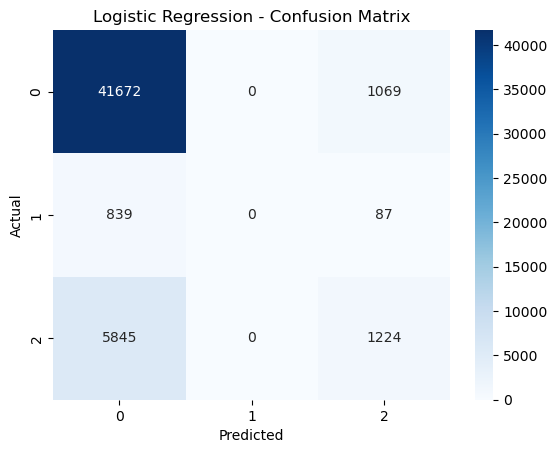

Cross-Validation Accuracy: 0.8468 ± 0.0009

=== Decision Tree ===
Test Accuracy: 0.8457
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.52      0.17      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.38      0.39     50736
weighted avg       0.80      0.85      0.81     50736



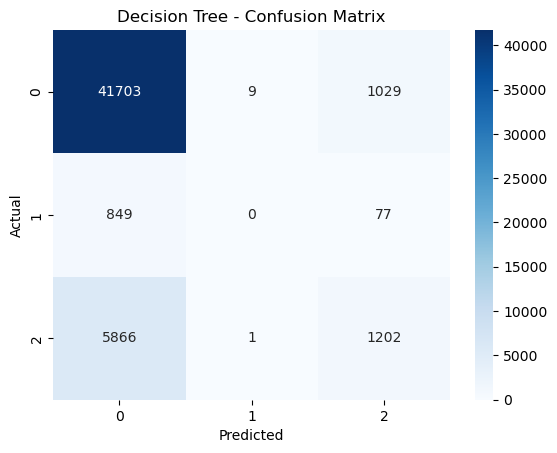

Cross-Validation Accuracy: 0.8461 ± 0.0005

=== Random Forest ===
Test Accuracy: 0.8499
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.58      0.16      0.25      7069

    accuracy                           0.85     50736
   macro avg       0.48      0.38      0.39     50736
weighted avg       0.81      0.85      0.81     50736



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


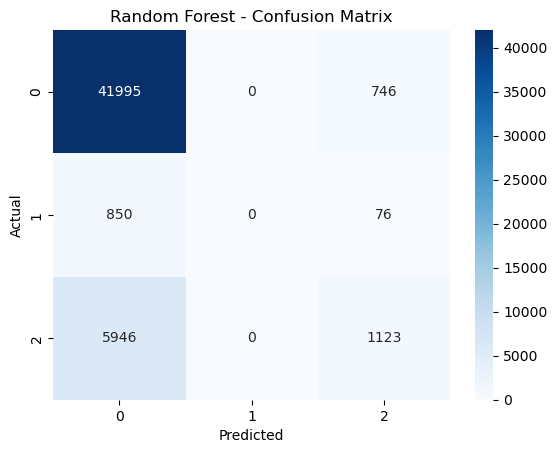

Cross-Validation Accuracy: 0.8493 ± 0.0007

=== k-NN ===
Test Accuracy: 0.8399
              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91     42741
         1.0       0.50      0.00      0.00       926
         2.0       0.46      0.17      0.25      7069

    accuracy                           0.84     50736
   macro avg       0.61      0.38      0.39     50736
weighted avg       0.80      0.84      0.80     50736



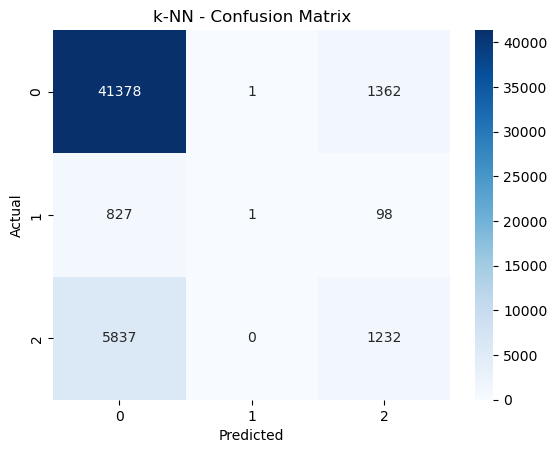

Cross-Validation Accuracy: 0.8386 ± 0.0009

=== LinearSVC ===
Test Accuracy: 0.8459
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.56      0.09      0.15      7069

    accuracy                           0.85     50736
   macro avg       0.47      0.36      0.36     50736
weighted avg       0.80      0.85      0.79     50736



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


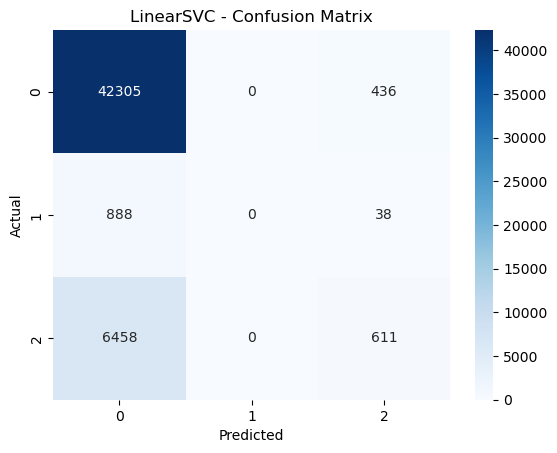

/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual`

Cross-Validation Accuracy: 0.8464 ± 0.0010

=== GaussianNB ===
Test Accuracy: 0.7579
              precision    recall  f1-score   support

         0.0       0.91      0.81      0.85     42741
         1.0       0.04      0.02      0.03       926
         2.0       0.32      0.57      0.41      7069

    accuracy                           0.76     50736
   macro avg       0.43      0.46      0.43     50736
weighted avg       0.81      0.76      0.78     50736



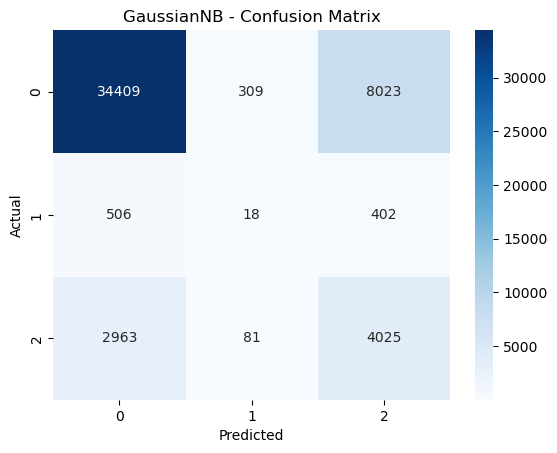

Cross-Validation Accuracy: 0.7570 ± 0.0023


In [13]:
from sklearn.model_selection import cross_val_score

cv_results = {}

for name, model in best_models.items():
    print(f"\n=== {name} ===")
    
    # Predictions and metrics
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"Test Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_results[name] = {
        "Test Accuracy": acc,
        "CV Accuracy": np.mean(cv_scores),
        "CV Std": np.std(cv_scores)
    }
    print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

In [15]:
# One-hot encode target
y_train_oh = to_categorical(y_train, num_classes=3)
y_test_oh = to_categorical(y_test, num_classes=3)

# Build NN
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

nn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = nn.fit(X_train_scaled, y_train_oh, validation_split=0.2, epochs=15, batch_size=64, verbose=1)


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.8381 - loss: 0.4276 - val_accuracy: 0.8505 - val_loss: 0.3911
Epoch 2/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 1s 356us/step - accuracy: 0.8490 - loss: 0.3939 - val_accuracy: 0.8505 - val_loss: 0.3910
Epoch 3/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 1s 362us/step - accuracy: 0.8496 - loss: 0.3918 - val_accuracy: 0.8503 - val_loss: 0.3916
Epoch 4/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 1s 370us/step - accuracy: 0.8506 - loss: 0.3924 - val_accuracy: 0.8519 - val_loss: 0.3909
Epoch 5/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step - accuracy: 0.8509 - loss: 0.3936 - val_accuracy: 0.8501 - val_loss: 0.3931
Epoch 6/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 1s 343us/step - accuracy: 0.8533 - loss: 0.3869 - val_accuracy: 0.8513 - val_loss: 0.3912
Epoch 7/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 1s 342us/step - accuracy: 0.8502 - loss: 0.3925 - val_accuracy: 0.8507 - val_loss: 0.3915
Epoch 8/15
2537/2537 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - accuracy: 0.8515 -

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 0s 151us/step
Neural Net Test Accuracy: 0.8465
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     42741
         1.0       0.00      0.00      0.00       926
         2.0       0.51      0.22      0.31      7069

    accuracy                           0.85     50736
   macro avg       0.46      0.40      0.41     50736
weighted avg       0.80      0.85      0.81     50736



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


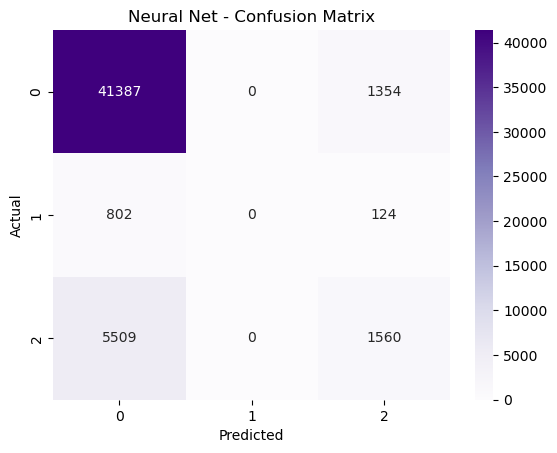

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Net CV Accuracy: 0.8494 ± 0.0010


In [17]:
from sklearn.model_selection import StratifiedKFold

# Evaluate
nn_preds = nn.predict(X_test_scaled)
nn_preds_classes = np.argmax(nn_preds, axis=1)
nn_acc = accuracy_score(y_test, nn_preds_classes)
print(f"Neural Net Test Accuracy: {nn_acc:.4f}")
print(classification_report(y_test, nn_preds_classes))

sns.heatmap(confusion_matrix(y_test, nn_preds_classes), annot=True, fmt="d", cmap="Purples")
plt.title("Neural Net - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Simulate cross-val
skf = StratifiedKFold(n_splits=5)
nn_cv_scores = []

for train_idx, val_idx in skf.split(X_train_scaled, y_train):
    X_t, X_v = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_t = to_categorical(y_train.iloc[train_idx], 3)
    y_v = to_categorical(y_train.iloc[val_idx], 3)

    model_cv = Sequential([
        Dense(64, activation='relu', input_shape=(X_t.shape[1],)),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model_cv.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model_cv.fit(X_t, y_t, epochs=10, batch_size=64, verbose=0)
    score = model_cv.evaluate(X_v, y_v, verbose=0)[1]
    nn_cv_scores.append(score)

cv_results["NeuralNet"] = {
    "Test Accuracy": nn_acc,
    "CV Accuracy": np.mean(nn_cv_scores),
    "CV Std": np.std(nn_cv_scores)
}

print(f"Neural Net CV Accuracy: {np.mean(nn_cv_scores):.4f} ± {np.std(nn_cv_scores):.4f}")

Model Comparison Summary:
                     Test Accuracy  CV Accuracy    CV Std
NeuralNet                 0.846480     0.849377  0.001048
Random Forest             0.849850     0.849254  0.000709
Logistic Regression       0.845475     0.846775  0.000875
LinearSVC                 0.845869     0.846362  0.000977
Decision Tree             0.845652     0.846110  0.000517
k-NN                      0.839857     0.838596  0.000887
GaussianNB                0.757884     0.757002  0.002319


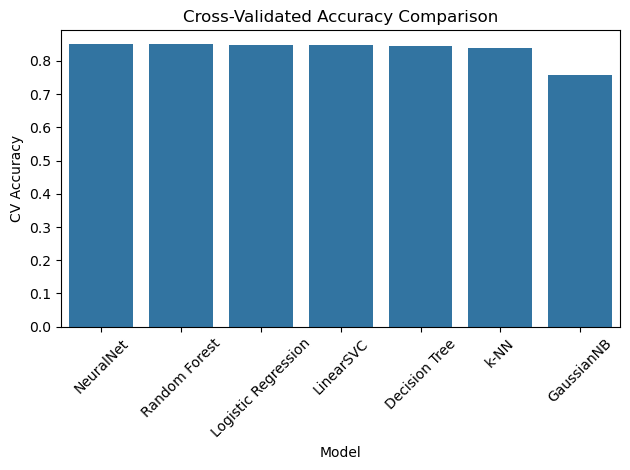

In [19]:
results_df = pd.DataFrame(cv_results).T
results_df = results_df.sort_values("CV Accuracy", ascending=False)

print("Model Comparison Summary:")
print(results_df)

sns.barplot(data=results_df.reset_index(), x='index', y='CV Accuracy')
plt.xticks(rotation=45)
plt.title("Cross-Validated Accuracy Comparison")
plt.ylabel("CV Accuracy")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

In [25]:
import joblib

model = best_models["Random Forest"]
joblib.dump(model, "diabetes_model.pkl")

['diabetes_model.pkl']